<a href="https://colab.research.google.com/github/jacksongold2016/International-Figure-Skating-and-Machine-Learning/blob/main/CIS_5450_Final_Project_Gold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CIS 5450 Final Project - Figure Skating Score Prediction**
*Jakcson Gold, Mikey Himes, Adam Peles!*

# Part 1: Introduction

For our final project, we aimed to better understand the scoring of major international figure skating competions from October 2016 through December 2017. Some of these include The International Figure Skating Union (ISU) World Figure Skating Championships 2017 and The ISU Grand Prix of Figure Skating Final 2016. We made use of 4 data frames. While they are explained in greater depth later, in brief, `performances` gives high level information about the total scores and skaters in each routine; `judged_aspects` has information about the score breakdown of routines; `judge_scores` further breaks down each score into the scores that each of the individiual judges; and finally, `programs` gives information about the breakdown of all of the competitions and events that we will be analyzing.

By correctly merging (see ERD) we hope to gain insight about the leading factors, jumps, and other components that lead to a winning score at the highest level of the sport.

We hope you not only find out analysis interesting but also learn something new about the rather niche sport of figure skating.


## 1.1: Necessary Background Information

The data used in our analysis uses the International Judgisial System (IJS) in order to score athletes. It it rather confusing and I encourage the reader to ([read more](https://www.usfigureskating.org/about/scoring-system)) but we will expain the relevant aspects




### 1.1.1 Understanding the IJS pt.1



On a high level skaters are scored over 2 distince sections - elements and components.

**Elements:** These are the jumps, spins, and other highly technical aspects that figure skating is known for. The most common types of elements are Axels(A), Lutzs(Lz), and Flips(F).



---


**Components:** These are the more artistic aspects of a skating routine. There are 4 main types being *Performance*, *Transitions*, *Compositions*, and *Interpretation of the Music* which thankfully are all well named.




### 1.1.2 Understanding the IJS pt.2

Every competable Element and Component has an abbreviation that is used as a shorthand for scoring purposes, however there are hundreds which can be found [here](http://www.isuresults.com/seminars/AbbreviationsElements_2014_15.pdf).

 If a skate preforms a double, triple, or even quad version of these jumps they are denoted with a 2,3, or 4 respectivly (a triple axel would be 3A). It is common to see a skater perform a sequence of Elements and Components in series. In this case, they are scored as a single united and denoted with a +. For example if a skater executed a Quad Axel into a Double Flip (a sequence pioneered by American Olypmics Skater Nathan Chen) the IJS would denote it a `4A + 2F`





### 1.1.3 Scoring of Elements and Components

 Both Elements and Components are scored in 2 parts. The first is the base value. This represents the relative difficulty of the Element or Component. The second is the Grade of Execution, which ranges from -5.0 to +5.0 and represents how well or poorly the skater executed the Element or Component. These 2 parts are then summmed to form the judge score. In all events included here, the ISU mandated that there be 9 judges who all compute a judge score for each attribute. Of the 9 judge scores the max and min are dropped and the rest are averaged to form the panel score. After the skate is completed all panel scores are summed up to form Element and Component scores respectively which are summed to form the final score of the skate.

This is a brief overview of the ISU and the IJS. There is obviously much more going on but this should be sufficient to understand the data. As other relevant features of figure skating become important they will be addressed.

##1.2 Visual Examples

In order to give the reader a more visual representation of Elements, Components, and the differences between them we decide to send our most adept figure skater, Jackson, to the rink in order to get some live videos.

### 1.2.1 [Element] The Single Axel

[Here](https://drive.google.com/file/d/16T7ZqME_uQ-AFRQ8iND6sjQdqrLNZdaH/view?usp=drive_link) is Jackson performing the Element 1A or a single Axel

### 1.2.2 [Element] The Upright Spin

[Here](https://drive.google.com/file/d/1hwr_2dETg5mYvBnfddJNSU15_QDErP1P/view?usp=drive_link) is Jackson performing the Element USp or a Single Upright Spin

### 1.2.3 [Component] Transition

[Here](https://drive.google.com/file/d/1B2aCR3naQR1VnMjwhtsG9DCJjHvXXu1K/view?usp=drive_link) is Jackson performing a Transition Component of his own design

While all of the judges in the ISU would most definatly give Jackson a -5.0 for his GOE. We hope actually seeing some of the aspects discussed will give you a more holistic view of the data and the analysis we preform from here on out.

# Part 2: Data Loading & Preprocessing




Initial Imports and Environment Set-Up

In [ ]:
pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 811.0 kB/s eta 0:00:00


In [ ]:
### Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


### Installs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler




## 2.1 Loading and Cleaning Judged/Performed Aspects

### 2.1.1 Loading Data From Github

Given the size of the data we deemed it best to import directly from github. We had the issue of the notebook crashing and us having to reload all our data into colab.

In [ ]:
# load in the dataframe
url = 'https://raw.githubusercontent.com/BuzzFeedNews/figure-skating-scores/master/data/tidy/judged-aspects.csv'
judged_aspects = pd.read_csv(url)
judged_aspects.head()

,aspect_id,performance_id,section,aspect_num,aspect_desc,info_flag,credit_flag,base_value,factor,goe,ref,scores_of_panel
0,00034b9414,b639d77459,components,NaN,Transitions,NaN,NaN,NaN,0.8,NaN,NaN,9.07
1,0004dd08d6,9589bb2ebf,components,NaN,Transitions,NaN,NaN,NaN,0.8,NaN,NaN,6.64
2,000b8b5070,71d2b1b597,components,NaN,Performance,NaN,NaN,NaN,1.0,NaN,NaN,7.68
3,000cec97c9,41a2345881,components,NaN,Transitions,NaN,NaN,NaN,0.8,NaN,NaN,4.71
4,000df5399a,b017147b2f,elements,1.0,3Tw2,NaN,NaN,5.8,NaN,-0.2,NaN,5.60


###2.1.2 Analysis of Columns

Taking it column by column.

*   `aspect_id ` is a unique id for each an every Element or Component performed in a given routine - it is not specific to the actual skill performed but rather the athlete and the event

* `performance_id` is a unique id specific to a skate. That is each time an athlete performs they get a new and unique performace_id for that routine

* `section` classifies the aspect as either an Element or Component

* `aspect_num` is in refrence to the order in which the current aspect was performed relative to the routine it was performed in. That is first, fifth, etc

* `aspect_desc` This is either the ISU abbreviation mentioned above or the type of Component

* `intro_flag` and `credit_flag` are both used for TV viewership (if you have ever seen the colored boxes under the routine score when watching the Olympics)

* `base_value` The relative difficulty of an aspect (mentioned above)

* `factor ` A nuber between 0 and 1 that is multiplied to the base value to adjust for a number of factors. This is almost exclusively used for Component instead of Elements

* `goe` Or Grade of Execution is a number between -5.0 and 5.0 (mentioned above)

* `ref` The id of the referee.

* `score_of_panel` the score awarded by the judges for this aspect

###2.1.3 Droping Unneeded Columns

Since `info_flag` and `credit_flag` are only used for viewership purposes and we will not be running any models on images/videos of the actual performances they will not provide any value to our anaylsis.



In [ ]:
# Drop ref column (we have a table for that) and the flags (as they are only for tv viewership)
judged_aspects = judged_aspects.drop('info_flag', axis = 1)
judged_aspects = judged_aspects.drop('credit_flag', axis = 1)


Without watching each and every routine there is no way to figure out the ordering of all of the diferent aspects so there is not much we can do with the `aspect_num` column

In [ ]:
# There is unfortunately no way to infer the order the elements were performed (without watching the routine)
judged_aspects = judged_aspects.drop('aspect_num', axis = 1)


Aside from being mostly null, the id of the ref does not provide us with any new information as we know the score is a result of all 9 judges so this id will not provide enough information

In [ ]:
judged_aspects = judged_aspects.drop('ref', axis = 1)

###2.1.4 Filling Null Values

We know that Grade of Execution and Factor should both be intergers (1 or 0) so we can replace all of the null values in the dataframe (there are alot). If no GOE is provided then we know that they got a neutral score being 0. Similarly for factor if nothing is provided we know it did not have an effect on the final score

In [ ]:
# If GOE is null then it should be 0 - neutral execution score
judged_aspects['goe'].fillna(0, inplace=True)

# If factor is null then it should be 1 - unweighted component
judged_aspects['factor'].fillna(1, inplace=True)


### 2.1.5 Computing Missing Scoring Aspects

We know the formula for the final score of an apsect is

```
# final score = base value * factor + goe
```
This is becuase the GOE as well as the final score go though the same dropping and averaging process for each judge (mentioned above). From this we can work backwards to find all of the missing base values (we filled in factor and goe and final score has no nulls).


In [ ]:
# Now we can backtrack and fill in the base value as we know: final score = base value * factor + goe
judged_aspects['base_value'] = ((judged_aspects['scores_of_panel']  - judged_aspects['goe']) / judged_aspects['factor']).round(2)


judged_aspects.head()

,aspect_id,performance_id,section,aspect_desc,base_value,factor,goe,scores_of_panel
0,00034b9414,b639d77459,components,Transitions,11.34,0.8,0.0,9.07
1,0004dd08d6,9589bb2ebf,components,Transitions,8.30,0.8,0.0,6.64
2,000b8b5070,71d2b1b597,components,Performance,7.68,1.0,0.0,7.68
3,000cec97c9,41a2345881,components,Transitions,5.89,0.8,0.0,4.71
4,000df5399a,b017147b2f,elements,3Tw2,5.80,1.0,-0.2,5.60


###2.1.6 Conversion to Decimal

Upon inspection we notice that the `aspect_id` and `performance_id` columns are actually in hexadecimal (no clue why) so we must convert them back to their base 10 equivalents

In [ ]:
judged_aspects['aspect_id'] = judged_aspects['aspect_id'].apply(lambda x: int(x, 16))
judged_aspects['performance_id'] = judged_aspects['performance_id'].apply(lambda x: int(x, 16))

## 2.2 Loading and Cleaning Judge Score


### 2.2.1 Loading Data From Github

Given that there are 9 judges and ~23000 different preformed aspects we have roughly ~200,000 rows which justifies directly importing it from github

In [ ]:
url = 'https://raw.githubusercontent.com/BuzzFeedNews/figure-skating-scores/master/data/tidy/judge-scores.csv'
judge_scores = pd.read_csv(url)

###2.2.2 Analysis of Columns



*  `apsect_id ` The same as in `judged_aspects`

* `judge` Refers to which of the 9 judges scored the aspect. Note that for each aspect all 9 judges are asked give a score. As mentioned above those scores are then used to calculuate the final score. However, judges are allowed to abstain which would result in a NaN or NULL value

* `score` The score (as a function of GOE, factor and base value) that was awarded to the aspect according to the specific judge. Used in the calculation of the final score



### 2.2.3 Correcting Abstentions

Since judges can abstain we can safely drop those rows as they by definition do not have any relevance to the final score

In [ ]:
# Not all of the scores are numbers so lets drop those
judge_scores = judge_scores[judge_scores['score'].apply(lambda x: isinstance(x, int) or isinstance(x, float))]


### 2.2.4 Hexidecimal Conversion

As seen previously we must also convert `aspect_id` back into a base 10 format

In [ ]:
# Again - convert aspect_id to decimal
judge_scores['aspect_id'] = judge_scores['aspect_id'].apply(lambda x: int(x, 16))


In [ ]:
judge_scores.head(100)

,aspect_id,judge,score
0,55284756,J1,9.00
1,55284756,J2,9.00
2,55284756,J3,8.75
3,55284756,J4,9.25
4,55284756,J5,9.00
...,...,...,...
95,407190001,J6,0.00
96,407190001,J7,0.00
97,407190001,J8,1.00
98,407190001,J9,0.00


###2.2.5 Reformatting judges

We can see that all entries in the judges column are preceed by a J the followed by the number of the judge. Since all of these have the J and since it does not provide any new information we can get rid of it. In order to do this we utilized a lambda function to get rid of the first character of each string in the judge column

In [ ]:
# The only thing left to clean is converting the judges to ints by removing the J
judge_scores['judge'] = judge_scores['judge'].apply(lambda x: int(x[1:]))

##2.3 Loading and Cleaning Performance Info DF

###2.3.1 Loading in Data

For continuity and consistency we want to take the burden off of colab itself for storing data so we will import the csv directly from its github link

In [ ]:
url = 'https://raw.githubusercontent.com/BuzzFeedNews/figure-skating-scores/master/data/tidy/performances.csv'
performances = pd.read_csv(url)
performances.head(10)

,performance_id,competition,program,name,nation,rank,starting_number,total_segment_score,total_element_score,total_component_score,total_deductions
0,6e4bd41ac5,Grand Prix Final 2017 Senior and Junior,ICE DANCE FREE DANCE,Anna CAPPELLINI / Luca LANOTTE,ITA,5,1,110.99,56.01,54.98,0.0
1,562c01c5a6,Grand Prix Final 2017 Senior and Junior,ICE DANCE FREE DANCE,Madison HUBBELL / Zachary DONOHUE,USA,4,2,112.59,57.42,55.17,0.0
2,2de894c029,Grand Prix Final 2017 Senior and Junior,ICE DANCE FREE DANCE,Madison CHOCK / Evan BATES,USA,3,3,112.79,57.25,55.54,0.0
3,06e4b8b67e,Grand Prix Final 2017 Senior and Junior,ICE DANCE FREE DANCE,Maia SHIBUTANI / Alex SHIBUTANI,USA,6,4,109.91,54.15,55.76,0.0
4,72e3228deb,Grand Prix Final 2017 Senior and Junior,ICE DANCE FREE DANCE,Tessa VIRTUE / Scott MOIR,CAN,2,5,118.33,59.66,58.67,0.0
5,08c6ee8862,Grand Prix Final 2017 Senior and Junior,ICE DANCE FREE DANCE,Gabriella PAPADAKIS / Guillaume CIZERON,FRA,1,6,120.09,60.85,59.24,0.0
6,c080766775,Grand Prix Final 2017 Senior and Junior,ICE DANCE SHORT DANCE,Anna CAPPELLINI / Luca LANOTTE,ITA,6,1,74.24,37.87,36.37,0.0
7,4edddce1b5,Grand Prix Final 2017 Senior and Junior,ICE DANCE SHORT DANCE,Madison HUBBELL / Zachary DONOHUE,USA,4,2,74.81,38.22,36.59,0.0
8,57288bfe78,Grand Prix Final 2017 Senior and Junior,ICE DANCE SHORT DANCE,Madison CHOCK / Evan BATES,USA,5,3,74.36,38.08,36.28,0.0
9,a6d14ef399,Grand Prix Final 2017 Senior and Junior,ICE DANCE SHORT DANCE,Maia SHIBUTANI / Alex SHIBUTANI,USA,3,4,78.09,40.85,37.24,0.0


###2.3.2 Analysis of Columns



*   `performance_id` The same unique id specific to each routine performed

* `competition` Refers to the name of the international competition the routine was performed in (ex: World Figure Skating Championships)

* `program` This refers to the specific event the routine was competed in (ex: Short vs Long Dance or Pairs vs Solo)

* `name` The name or names of the skater(s) who perfomred. Can be 1 for a singles event or 2 for a pair

* `nation` The country the skater hails from

* `rank` At the time of the skate the skater's ISU international ranking

* `starting_number` Within a specific program, the order the performance was performed (ex if it has value 5 they were 5th up to skate)

* `total_segment_score` The final adjusted score awarded to the performance. It is found as a sum of `total_element_score` + `total_component_score` - `total_deuctions`

* `total_element_score`  The final adjusted score awarded to all of the Element aspects performed, not any of the Component aspects

* `total_component_score`  The final adjusted score awarded to the all of the Components aspects performed, not any of the Element aspects

* `total_deuctions` High level penatlies awarded to skater(s) such as an illegal movement for example. Note that this is NOT the GOE score and can only negativly impact the `total_segment_score`





###2.3.3 Creating Auxilirary Columns

As we can see the `name` column is formatted as just 1 name or has 2 names that are seperated by a `/` between them. In order to gain useful insights into individial atheletes (as it is common for skaters to perform as both an individual and a pair) we want to split `name` into 2 new columns `first_skater` and `second_skater`

In [ ]:
### Just for safety lets re-cast names as a string
performances['name'] = performances['name'].astype(str)
### Now splitting on the buffer / we can take the first and second elements to be our new columns
performances['first_skater'] = performances['name'].str.split('/').str[0]
performances['second_skater'] = performances['name'].str.split('/').str[1]


Note: We were unable to find an example where there was a skating pair with 2 different nationalities. While it does not say anywhere in the ISU or IJS documentation that atheletes must hail from the same country - the lack of a counter example allows us to make that assumption.

Since we no longer need the origional `name` column we can just drop it

In [ ]:
### Drop now redundant name column
performances = performances.drop('name', axis = 1)

###2.3.4 Conversion from Hexadecimal

Like in previous dataframes 'performance_id' is in hex and we have to do the same procedure of converting it back to decimal

In [ ]:
# Figure skating is weird - convert from hex
performances['performance_id'] = performances['performance_id'].apply(lambda x: int(x, 16))


In [ ]:
performances.head(10)

,performance_id,competition,program,nation,rank,starting_number,total_segment_score,total_element_score,total_component_score,total_deductions,first_skater,second_skater
0,473718594245,Grand Prix Final 2017 Senior and Junior,ICE DANCE FREE DANCE,ITA,5,1,110.99,56.01,54.98,0.0,Anna CAPPELLINI,Luca LANOTTE
1,370105501094,Grand Prix Final 2017 Senior and Junior,ICE DANCE FREE DANCE,USA,4,2,112.59,57.42,55.17,0.0,Madison HUBBELL,Zachary DONOHUE
2,197175590953,Grand Prix Final 2017 Senior and Junior,ICE DANCE FREE DANCE,USA,3,3,112.79,57.25,55.54,0.0,Madison CHOCK,Evan BATES
3,29607114366,Grand Prix Final 2017 Senior and Junior,ICE DANCE FREE DANCE,USA,6,4,109.91,54.15,55.76,0.0,Maia SHIBUTANI,Alex SHIBUTANI
4,493436964331,Grand Prix Final 2017 Senior and Junior,ICE DANCE FREE DANCE,CAN,2,5,118.33,59.66,58.67,0.0,Tessa VIRTUE,Scott MOIR
5,37697259618,Grand Prix Final 2017 Senior and Junior,ICE DANCE FREE DANCE,FRA,1,6,120.09,60.85,59.24,0.0,Gabriella PAPADAKIS,Guillaume CIZERON
6,826788964213,Grand Prix Final 2017 Senior and Junior,ICE DANCE SHORT DANCE,ITA,6,1,74.24,37.87,36.37,0.0,Anna CAPPELLINI,Luca LANOTTE
7,338729689525,Grand Prix Final 2017 Senior and Junior,ICE DANCE SHORT DANCE,USA,4,2,74.81,38.22,36.59,0.0,Madison HUBBELL,Zachary DONOHUE
8,374342418040,Grand Prix Final 2017 Senior and Junior,ICE DANCE SHORT DANCE,USA,5,3,74.36,38.08,36.28,0.0,Madison CHOCK,Evan BATES
9,716476183449,Grand Prix Final 2017 Senior and Junior,ICE DANCE SHORT DANCE,USA,3,4,78.09,40.85,37.24,0.0,Maia SHIBUTANI,Alex SHIBUTANI


##2.4 Loading and Cleaning Program Info DF


###2.4.1 Loading in Data

This data frame shows the 152 events this data is from. These come from a total of 17 international competitions over the course of a year. For consistency we decided to use a github link instead of directly importing the data.

In [ ]:
url = 'https://raw.githubusercontent.com/BuzzFeedNews/figure-skating-scores/master/data/tidy/programs.csv'
programs = pd.read_csv(url)
programs.head()

,competition,program,pdf
0,Grand Prix Final 2017 Senior and Junior,ICE DANCE FREE DANCE,gpf2017_protocol.pdf
1,Grand Prix Final 2017 Senior and Junior,ICE DANCE SHORT DANCE,gpf2017_protocol.pdf
2,Grand Prix Final 2017 Senior and Junior,JUNIOR ICE DANCE FREE DANCE,gpf2017_protocol.pdf
3,Grand Prix Final 2017 Senior and Junior,JUNIOR ICE DANCE SHORT DANCE,gpf2017_protocol.pdf
4,Grand Prix Final 2017 Senior and Junior,JUNIOR LADIES FREE SKATING,gpf2017_protocol.pdf


###2.4.2 Dropping Non-Useful Columns

If you were to open these pdf files you will see they list a series of year specific protocols that affects the judging and scoring of the events in 2016 and 2017. While most of these are small changes - they are all taken into account in our anaylsis, however, the name of the pdf does not provide us with any usefully information so we can safely drop it.

In [ ]:
# Drop pdf column
programs = programs.drop('pdf', axis = 1)

In [ ]:
programs.head()

,competition,program
0,Grand Prix Final 2017 Senior and Junior,ICE DANCE FREE DANCE
1,Grand Prix Final 2017 Senior and Junior,ICE DANCE SHORT DANCE
2,Grand Prix Final 2017 Senior and Junior,JUNIOR ICE DANCE FREE DANCE
3,Grand Prix Final 2017 Senior and Junior,JUNIOR ICE DANCE SHORT DANCE
4,Grand Prix Final 2017 Senior and Junior,JUNIOR LADIES FREE SKATING


# Part 3: Entity Linking

##3.1 Entity Relationship Diagram

As seen in part 2. Each table has a variety of different information and columns. To help simplify and visualize this we have taken the libery of making an ER diagram to help simplify the problem

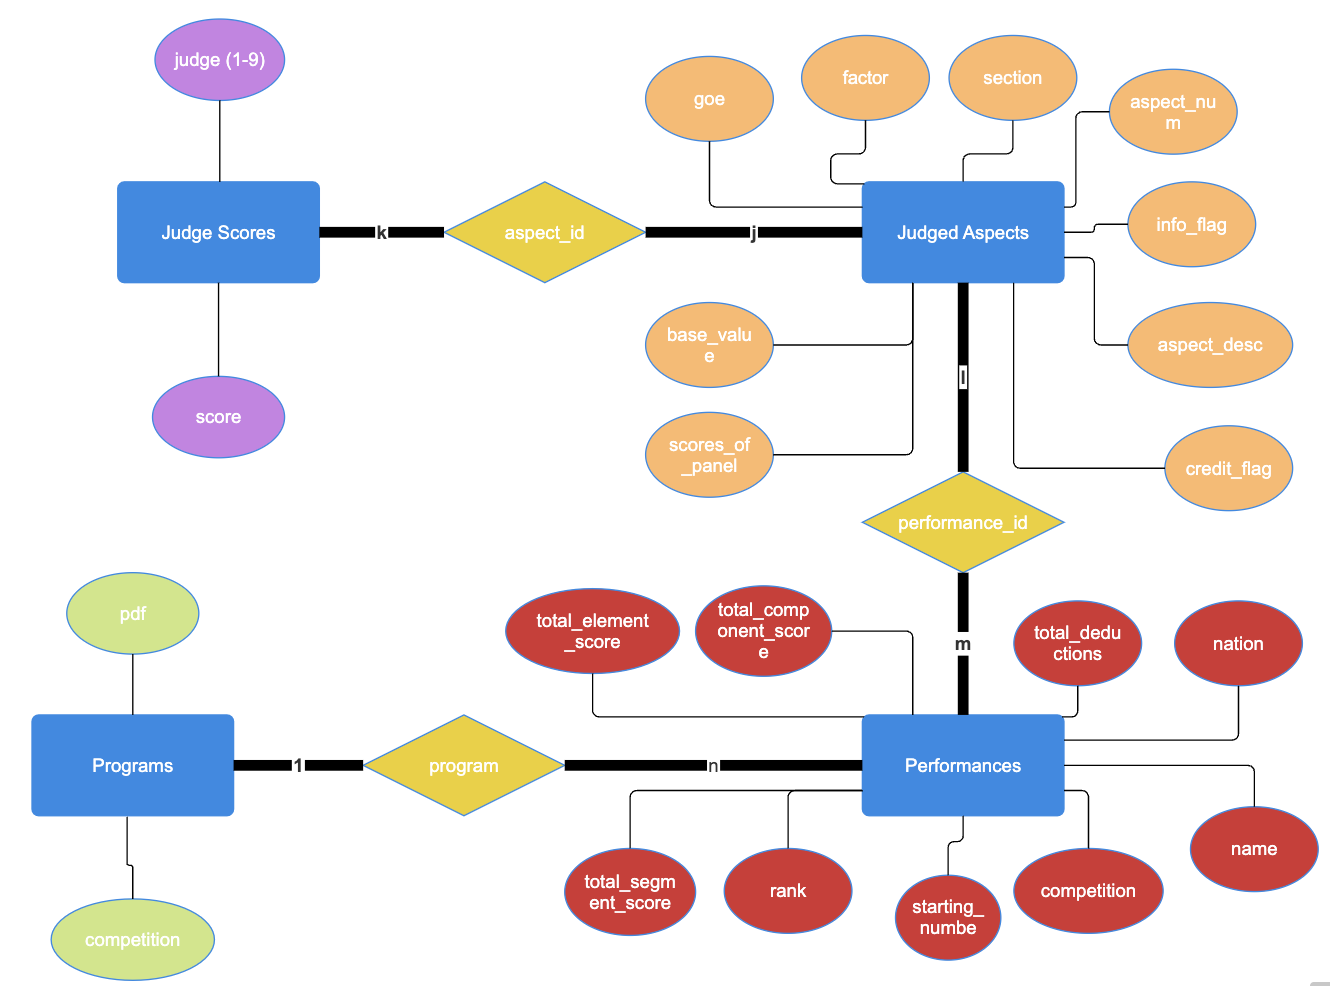

Key take aways:


1.   `judge_scores` and `judged_aspects` share the `aspect_id` column
2.   `judge_aspects` and `performances` share the `performance_id` column
3.   `performances` and `programs` share the `program` column
4. This diagram includes all columns that may have been dropped in part 2
5. We decided that that `total_segment_score` was not a compound or computed element was it was a given total (and that it can be broken down into other elements that contribute to it) which is more of a top down rather than bottem up view.



## 3.2 Merging Tables

We will beign our analysis by making `full_routine_info` which takes advantage of the `judge_scores`, `judged_aspects ` and   `performances`. Using the ER diagram we can see that we can merge `judge_scores`and  `judged_aspects` on `aspect_id`

In [ ]:
full_routine_info = pd.merge(judge_scores, judged_aspects, on='aspect_id')

Now we can take that merged dataset which has all of the yellow and purple cirlces. Further analysing the ER diagram we can merge `full_routine_info` with `performaces` on the verb  `performance_id`. This should give us a data frame with red, yellow, and purple circles. This gives us a large amount of info to begin our analysis of scores

In [ ]:
full_routine_info = pd.merge(full_routine_info, performances, on='performance_id')

In [ ]:
full_routine_info

,aspect_id,judge,score,performance_id,section,aspect_desc,base_value,factor,goe,scores_of_panel,...,program,nation,rank,starting_number,total_segment_score,total_element_score,total_component_score,total_deductions,first_skater,second_skater
0,55284756,1,9.00,782654469209,components,Transitions,11.34,0.8,0.0,9.07,...,LADIES SHORT PROGRAM,RUS,1,33,78.92,42.00,36.92,0.0,Evgenia MEDVEDEVA,NaN
1,55284756,2,9.00,782654469209,components,Transitions,11.34,0.8,0.0,9.07,...,LADIES SHORT PROGRAM,RUS,1,33,78.92,42.00,36.92,0.0,Evgenia MEDVEDEVA,NaN
2,55284756,3,8.75,782654469209,components,Transitions,11.34,0.8,0.0,9.07,...,LADIES SHORT PROGRAM,RUS,1,33,78.92,42.00,36.92,0.0,Evgenia MEDVEDEVA,NaN
3,55284756,4,9.25,782654469209,components,Transitions,11.34,0.8,0.0,9.07,...,LADIES SHORT PROGRAM,RUS,1,33,78.92,42.00,36.92,0.0,Evgenia MEDVEDEVA,NaN
4,55284756,5,9.00,782654469209,components,Transitions,11.34,0.8,0.0,9.07,...,LADIES SHORT PROGRAM,RUS,1,33,78.92,42.00,36.92,0.0,Evgenia MEDVEDEVA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214526,1061257283653,5,-3.00,706798677906,elements,3S<+COMBO,3.10,1.0,-2.1,1.00,...,LADIES SHORT PROGRAM,SGP,21,11,41.61,21.73,20.88,1.0,Chloe ING,NaN
214527,1061257283653,6,-3.00,706798677906,elements,3S<+COMBO,3.10,1.0,-2.1,1.00,...,LADIES SHORT PROGRAM,SGP,21,11,41.61,21.73,20.88,1.0,Chloe ING,NaN
214528,1061257283653,7,-3.00,706798677906,elements,3S<+COMBO,3.10,1.0,-2.1,1.00,...,LADIES SHORT PROGRAM,SGP,21,11,41.61,21.73,20.88,1.0,Chloe ING,NaN
214529,1061257283653,8,-3.00,706798677906,elements,3S<+COMBO,3.10,1.0,-2.1,1.00,...,LADIES SHORT PROGRAM,SGP,21,11,41.61,21.73,20.88,1.0,Chloe ING,NaN


## 3.3 Post-Join Cleaning

After performing our join, we realized there are still some categorical features we deem unimportant that we would like to remove. Here are the columns we are choosing to drop:



*   `competition` We deemed that there was nothing inherent to any 1 given competition that would cause a noticable change in performace of the athletes. Many arugue that high level competition brings out the best in atheletes but all the competitons the data is from are all roughly at the same internatinonal level (i.e. we are not using olympic data)

* `first_skater` and `second_skater` For this portion we are not looking at the progression of different athletes across multiple compeitions or years. Therefore the actual name of any of the skaters can be replaced with the `performance_id` that each of their skates are given

* `program` Much like the skater columns in this section we are not honing in on specific difference between different events but rather looking at the score more holistically. This is becuase all programs (ex: Mens Short Program) are all scored in the same manner. This means that the only difference in scores comes down to the aspects performed and the GOE of the athletes regardless of their program



In [ ]:
# Drop skater names and the programs as that is not something we are considering here
full_routine_info = full_routine_info.drop('program', axis = 1)
full_routine_info = full_routine_info.drop('first_skater', axis = 1)
full_routine_info = full_routine_info.drop('second_skater', axis = 1)
full_routine_info = full_routine_info.drop('competition', axis = 1)
full_routine_info

,aspect_id,judge,score,performance_id,section,aspect_desc,base_value,factor,goe,scores_of_panel,nation,rank,starting_number,total_segment_score,total_element_score,total_component_score,total_deductions
0,55284756,1,9.00,782654469209,components,Transitions,11.34,0.8,0.0,9.07,RUS,1,33,78.92,42.00,36.92,0.0
1,55284756,2,9.00,782654469209,components,Transitions,11.34,0.8,0.0,9.07,RUS,1,33,78.92,42.00,36.92,0.0
2,55284756,3,8.75,782654469209,components,Transitions,11.34,0.8,0.0,9.07,RUS,1,33,78.92,42.00,36.92,0.0
3,55284756,4,9.25,782654469209,components,Transitions,11.34,0.8,0.0,9.07,RUS,1,33,78.92,42.00,36.92,0.0
4,55284756,5,9.00,782654469209,components,Transitions,11.34,0.8,0.0,9.07,RUS,1,33,78.92,42.00,36.92,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214526,1061257283653,5,-3.00,706798677906,elements,3S<+COMBO,3.10,1.0,-2.1,1.00,SGP,21,11,41.61,21.73,20.88,1.0
214527,1061257283653,6,-3.00,706798677906,elements,3S<+COMBO,3.10,1.0,-2.1,1.00,SGP,21,11,41.61,21.73,20.88,1.0
214528,1061257283653,7,-3.00,706798677906,elements,3S<+COMBO,3.10,1.0,-2.1,1.00,SGP,21,11,41.61,21.73,20.88,1.0
214529,1061257283653,8,-3.00,706798677906,elements,3S<+COMBO,3.10,1.0,-2.1,1.00,SGP,21,11,41.61,21.73,20.88,1.0


In [ ]:
full_routine_info.dtypes

aspect_id                  int64
judge                      int64
score                    float64
performance_id             int64
section                   object
aspect_desc               object
base_value               float64
factor                   float64
goe                      float64
scores_of_panel          float64
nation                    object
rank                       int64
starting_number            int64
total_segment_score      float64
total_element_score      float64
total_component_score    float64
total_deductions         float64
dtype: object

#**Part 4: Exploratory Data Analysis (EDA)**

After analyzing summary statistics and comprehending the data distribution, we sought to deepen our insights by exploring the relationships between significant feature combinations, chosen based on their perceived importance both statistically and in the context of model development.




## 4.1 Total Breakdown of Score by Part

### 4.1.1 Composition of Score Histogram

**Motivation**

The purpose of this visual to explore the interplay between three key components: the element score, component score, and segment score. We aimed to develop a more concrete understanding of how these three scores relate via visualization. The graph serves as a starting point for deeper investigation into the factors contributing to overall performance scores in the dataset.


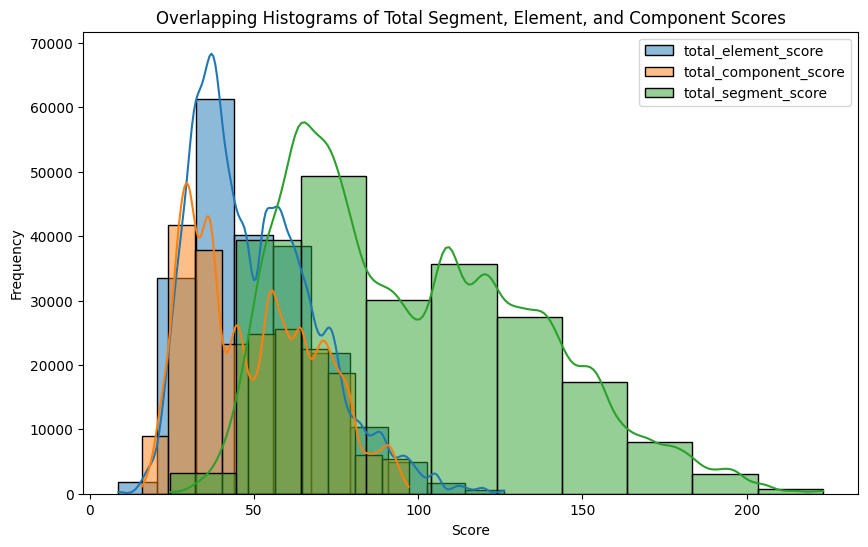

In [ ]:
plt.figure(figsize=(10, 6))

# Create three histograms with different colors
sns.histplot(full_routine_info['total_element_score'], bins=10, alpha=0.5, label='total_element_score', kde=True)
sns.histplot(full_routine_info['total_component_score'], bins=10, alpha=0.5, label='total_component_score', kde=True)
sns.histplot(full_routine_info['total_segment_score'], bins=10, alpha=0.5, label='total_segment_score', kde=True)


# Add labels and title
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Overlapping Histograms of Total Segment, Element, and Component Scores')

# Add legend and show plot
plt.legend(loc='upper right')
plt.show()


**Takeaways**

Upon closer examination, the graph makes sense given the relationship we know between the element score, component score, and segment score.
 * It is evident that the element score and component score combine to form the segment score. We can tell that the segment score is distributed such that it takes on higher values than the other two scores (its range is about double: 0-200 vs 0-100 for the element and component scores).

* Additionally, we see that component score is more heavily distributed towards lower values than element score, so we can presume that the element score is typically higher.

## 4.2 Nation Total Score breakdown

**Motivation:**

The next graph illustrates the breakdown of scores by country, providing insights into the distribution of performance quality across different nations. The inclusion of the number above each country's average total score offers context by indicating the quantity of performances from each nation present in the dataset. This visualization aims to uncover potential biases or discrepancies in the data and to facilitate a deeper understanding of the distribution of performance quality across countries.


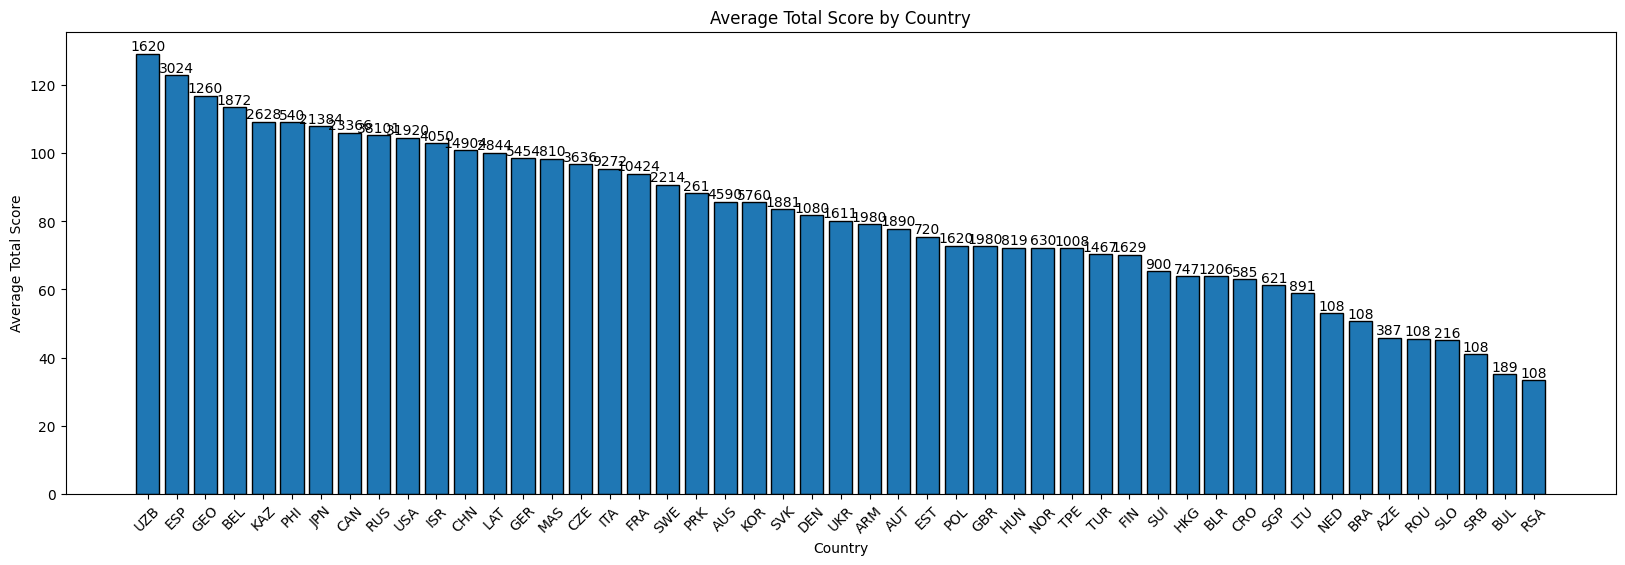

In [ ]:
# Group by nation and calculate the average total score and count
average_scores = full_routine_info.groupby('nation')['total_segment_score'].agg(['mean', 'count']).reset_index()

# Sort by average score
average_scores = average_scores.sort_values(by='mean', ascending=False)

# Set up the plot
plt.figure(figsize=(20, 6))

# Create a bar chart of the average total score
plt.bar(average_scores['nation'], average_scores['mean'])

# Add the number of scores above each bar
for i, bar in enumerate(plt.gca().patches):
    plt.gca().text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                   str(average_scores['count'].iloc[i]), ha='center', va='bottom')

# Add black borders to all bars
for bar in plt.gca().patches:
    bar.set_edgecolor('black')
    bar.set_linewidth(1)


# Add labels and title
plt.xlabel('Country')
plt.ylabel('Average Total Score')
plt.title('Average Total Score by Country')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.show()



**Takeaways:**

Upon examination, it becomes apparent that the data exhibits some degree of skewness.
* Although the data has been sorted by ascending average total score, the variation in the number of performances per country complicates the analysis. For instance, while Uzbekistan ranks highest in our graph based on average total score, it only has 1620 performances represented in the dataset. Conversely, Austria, with a comparatively lower average score, boasts 4590 performances, 3 times as many. This is true for many other countries like the USA, Italy, and Canada, etc.
* In addition, while there are a handful of countries with higher average total scores than Russia, they have a whopping 305 performances represented in the dataset. This incongruity suggests that the average score may not be a definitive indicator of the overall performance quality by country, but it still gives us a good idea when taken into account with the country's number of performances.

### 4.2.1 Number of Performances by Nation - Interactive Heatmap

**Motivation:**

We initially wanted to get a better look at which countries performed the most in a more visually pleasing manner than the graph above. We used a world map to show us which countries have the most performances overall. *Feel free to scroll around the globe, and zoom in to get a closer look at more specific countries*

In [ ]:
# Group the data by nation and count the number of entries
nation_counts = full_routine_info.groupby("nation").size().reset_index(name="count")

# Create a world map with the countries colored by the number of entries
fig = px.choropleth(nation_counts, locations="nation", color="count",
                    color_continuous_scale="Viridis",
                    featureidkey="properties.name")

# Update the layout
fig.update_layout(title="Number of Performances by Country",
                  geo=dict(showframe=False, projection={"type": "natural earth"}))

# Show the figure
fig.show()


**Takeaways:**

As expected, the Eastern European countries are far more experienced within the realm of ice skating compared to some of the western and southern countries in the world.

* More importantly, Russia is a dominator in terms of the amount of performances they have had in regards to our data set.
* The North American countries are not far behind Russia, most countries below the equator do not even had performances. It puts into perspective the type of sport that ice skating is as a whole.

Going forward with our data, we will make sure to tune our models to respect this property between the nations.

### 4.2.2  Boxplot of Nations and Rank

**Motivation:**

We decided to use a boxplot graph to find the pattern between the ranks of countries. This was for us to better understand the visual above but also see what kind of effect that rank might have on a nation when training a model on it as a feature. Additionally it shows us how skewed the ranks of certain countries are.

<ipython-input-31-77c4704ca77e>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




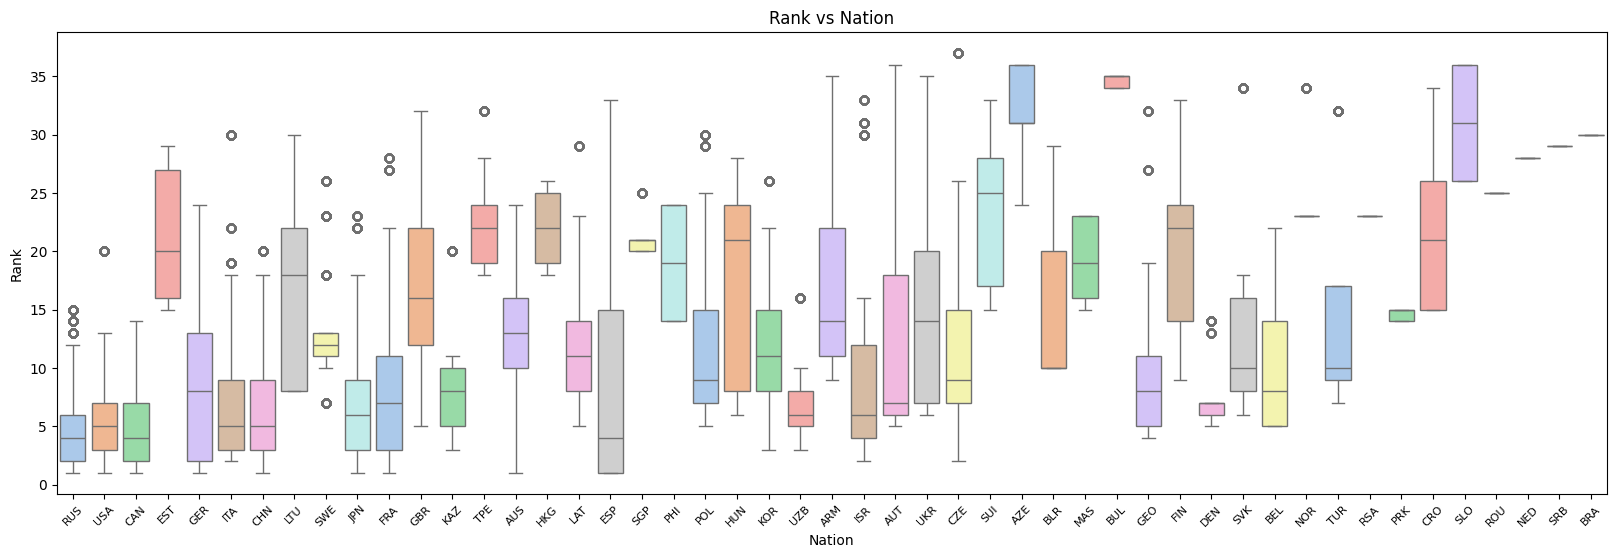

In [ ]:
# Create a box and whisker plot grouped by room_type
plt.figure(figsize=(20, 6))

ax = sns.boxplot(x="nation", y="rank", data=full_routine_info, palette = 'pastel')

# Set the plot title and axis labels
ax.set_title("Rank vs Nation")
ax.set_xlabel("Nation")
ax.set_ylabel("Rank")
plt.xticks(fontsize = 8, rotation=45)

# Show the plot
plt.show()

**Takeaways:**

Upon delving deeper into the data, we discerned that the rankings unveiled a narrative distinct from performance metrics, indicating that a country's overall performance prowess may not always align with the rank of its individual skaters.
* Interestingly, more developed countries and those located in northern regions tended to boast higher rankings, suggesting a correlation between socioeconomic factors and skating proficiency.
* Furthermore, we observed that Eastern European nations tended to attain higher rankings compared to their Western European counterparts, implying potential regional disparities in training infrastructure or judging criteria.
* This variation in rankings displays the complexity of the sport and underscores the importance of incorporating rank-country relationships into our modeling endeavors for a more comprehensive understanding of performance predictors.

##4.3 Average Deduction Relationships



### 4.3.1 Deductions by Rank (Boxplot)

**Motivation:**

In another boxplot graph, we decided to explore the feature of deductions, and if there might be any relationship between the deductions that a performance receives and their nation, rank, and other potential factors. We wanted to see what kind of role the deductions placed on a performer would have in our data set and then make a decision on creating our models for score prediction from there.

<ipython-input-32-5d6c11dc1a74>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




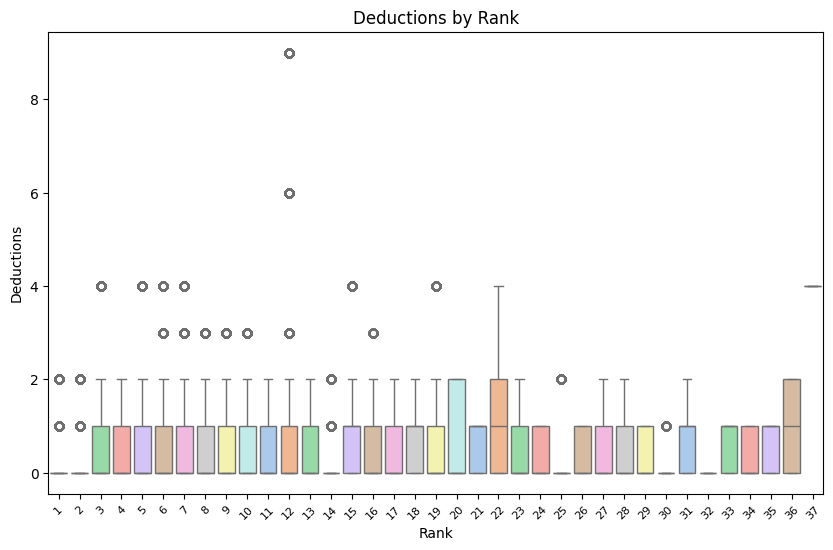

In [ ]:
# Create a box and whisker plot grouped by room_type
plt.figure(figsize=(10, 6))

ax = sns.boxplot(x="rank", y="total_deductions", data=full_routine_info, palette = 'pastel')

# Set the plot title and axis labels
ax.set_title("Deductions by Rank")
ax.set_xlabel("Rank")
ax.set_ylabel("Deductions")
plt.xticks(fontsize = 8, rotation=45)

# Show the plot
plt.show()

**Takeaways:**

While there is not a large variety of deductions due to the nature of ice skating as a sport we can see a few things:


*   Higher ranks (1-3) tend to have far less deductions than those that are lower ranked. The most deductions was ranked 22, however that could have been due to a variety of factors.
*   Overall that amount of deductions by rank is not super apparent, however it follows the intuition that a higher ranked skater would not have many deductions due to the quality of their skating.



### 4.3.2 Deductions by Nation (Boxplot)

**Motivation:**

In similar fashion to the boxplot above, we decided to determine what relationships, if any, there were between nation and deductions.

<ipython-input-33-471511c632f7>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




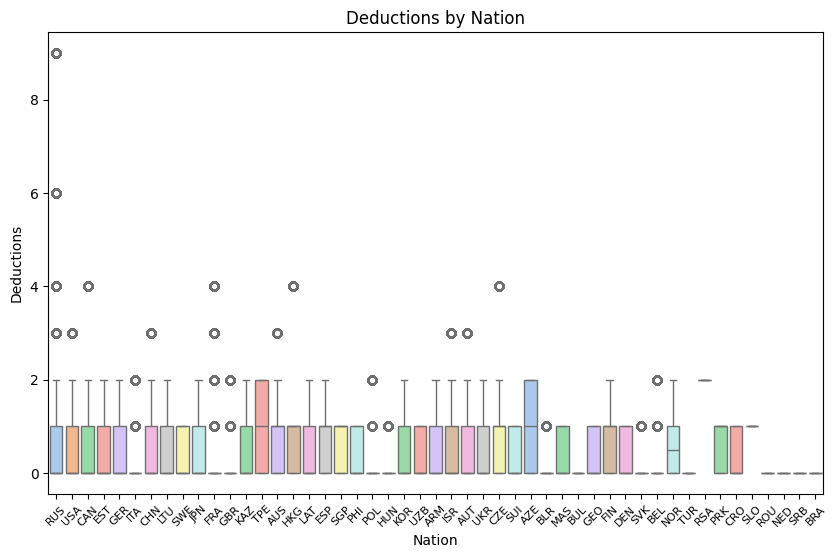

In [ ]:
# Create a box and whisker plot grouped by room_type
plt.figure(figsize=(10, 6))

ax = sns.boxplot(x="nation", y="total_deductions", data=full_routine_info, palette = 'pastel')

# Set the plot title and axis labels
ax.set_title("Deductions by Nation")
ax.set_xlabel("Nation")
ax.set_ylabel("Deductions")
plt.xticks(fontsize = 8, rotation=45)

# Show the plot
plt.show()

**Takeaways:**

While the spread of deductions by nation is not super varied, we can see that there is some discrepancies for certain countries. Potentially biased judges?
* The first major discrepancy we notice is that a lot of the Eastern European countries (Serbia, Turkey, Bulgaria, Slovenia) do not have any deductions. This is interesting considered that they are not the highest (although still high) performers.
* The next major discrepancy is the high amount of deductions against Russia, the spread on its plot is extremely large, indicating there may be some bias against Russian skaters. These will be taken into account in our models when determining overall score.

## 4.4 Aspect Scoring Relationships

### 4.4.1 Aspects vs Score (Boxplot)

**Motivation:**

We had a prediction that the aspects aka moves that the skaters performed would have a significant impact on their score. Thus, we created a boxplot to show the averages and overall distribution of scores received from skaters that performed that mvoe.




<ipython-input-34-5e1969f62c4d>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




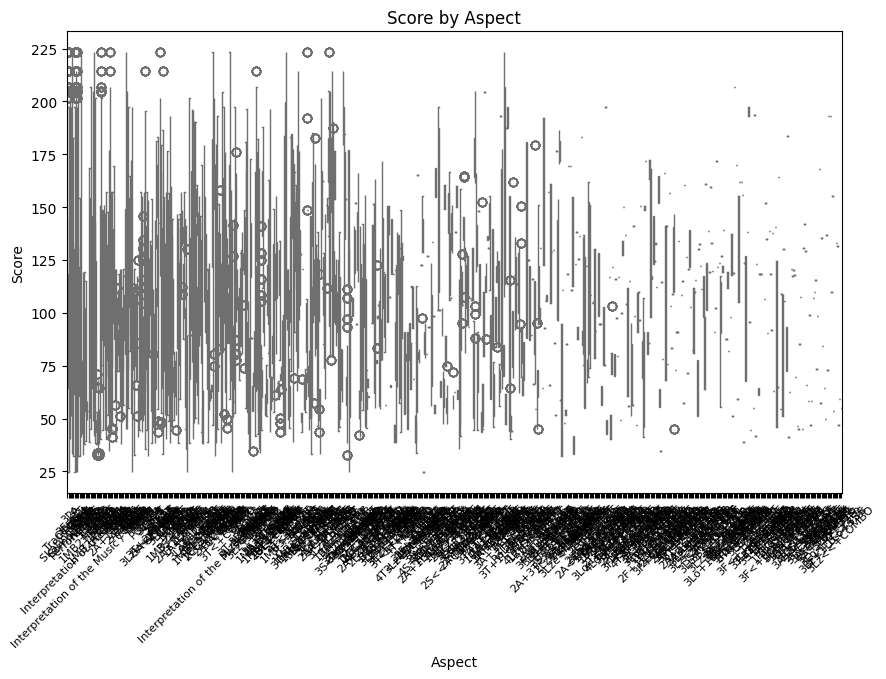

In [ ]:
# Create a box and whisker plot grouped by room_type
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x="aspect_desc", y="total_segment_score", data=full_routine_info, palette = 'pastel')

# Set the plot title and axis labels
ax.set_title("Score by Aspect")
ax.set_xlabel("Aspect")
ax.set_ylabel("Score")
plt.xticks(fontsize = 8, rotation=45)

# Show the plot
plt.show()


**Takeaways:**

The graph, while messy, shows us a few things:
* We cannot differentiate which aspects are the best, because there are so many they cannot fit on one graph. This also means we will have a lot of features in our data when we train models.
* There is definitely some sort of relationship that will play into how we create our models and how we tune them to account for the different aspects. We can see this because the spread of scores over each aspect varies heavily.


### 4.4.2 Filtering The Top 30 Aspects by Score (Boxplot)

**Motivation:**

Following the graph above, we determined that it is necessary to find the best aspects to determine if there is a relationship that is severe enough to account for when creating our model. Thus, we filtered the top 30 aspects and put them into a boxplot.

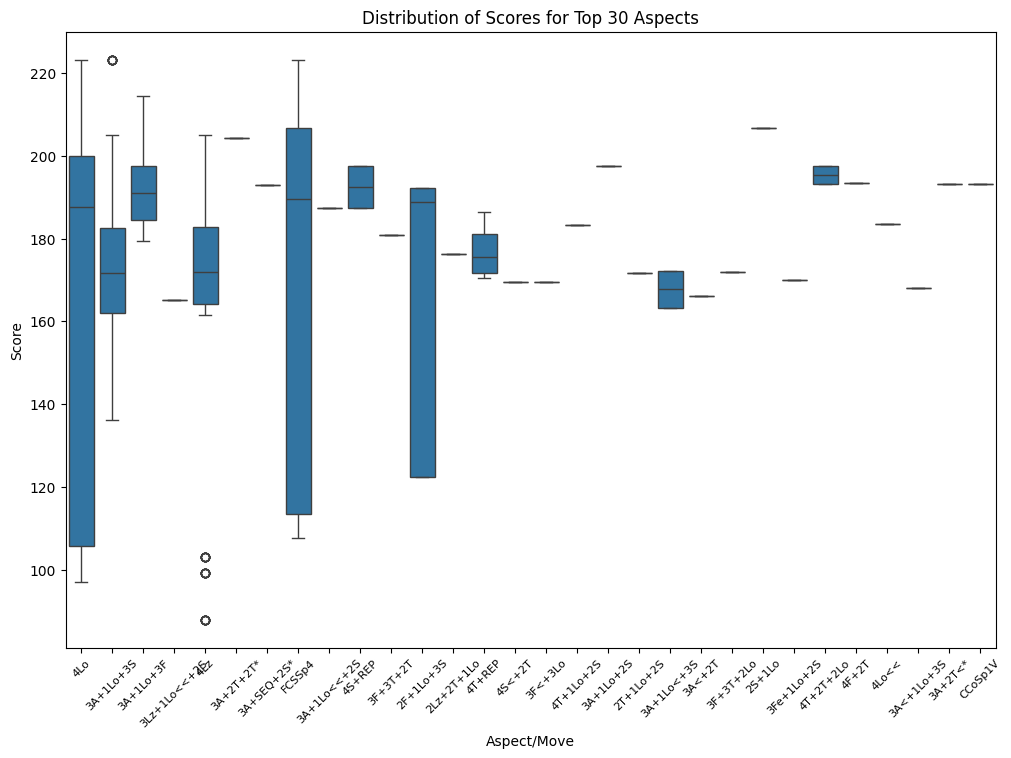

In [ ]:
# Calculate the mean score for each aspect
mean_scores = full_routine_info.groupby('aspect_desc')['total_segment_score'].mean()

# Get the top 30 aspects based on mean score
top_30_aspects = mean_scores.nlargest(30).index.tolist()

# Filter the DataFrame to include only the top 30 aspects
df_top_30 = full_routine_info[full_routine_info['aspect_desc'].isin(top_30_aspects)]

# Plot a boxplot for the top 30 aspects
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_top_30, x='aspect_desc', y='total_segment_score')
plt.xticks(fontsize = 8, rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Aspect/Move')
plt.ylabel('Score')
plt.title('Distribution of Scores for Top 30 Aspects')
plt.show()


**Takeaways:**

* We can see that the 4Lo is the highest scoring single movement(meaning it was not in combination with any other aspects and scored the highest)
* Also, the 3A + 2T + 2T*, 3A + SEQ + 2S*, and 3F + 3T + 2Lo were the highest aspect combinations overall. These have some simliarities, including the use of a turn (T).
* The aspects all have severely different occurrence amounts. Some aspects are performed a lot more than others, indicating that the dataset could have an inherent bias towards some of these less performed but more highly rated aspects than the other common ones that have more judges to score it.

### 4.4.3 Filtering the Bottom 30 Aspects by Score (Boxplot)

**Motivation:**

We wanted a better look at the relationship not only between the top 30 and the bottom 30, but rather the relationship within the bottom 30. We chose this scale because we believed it would be an accurate depiction, similar to the top 30 aspects shown above.

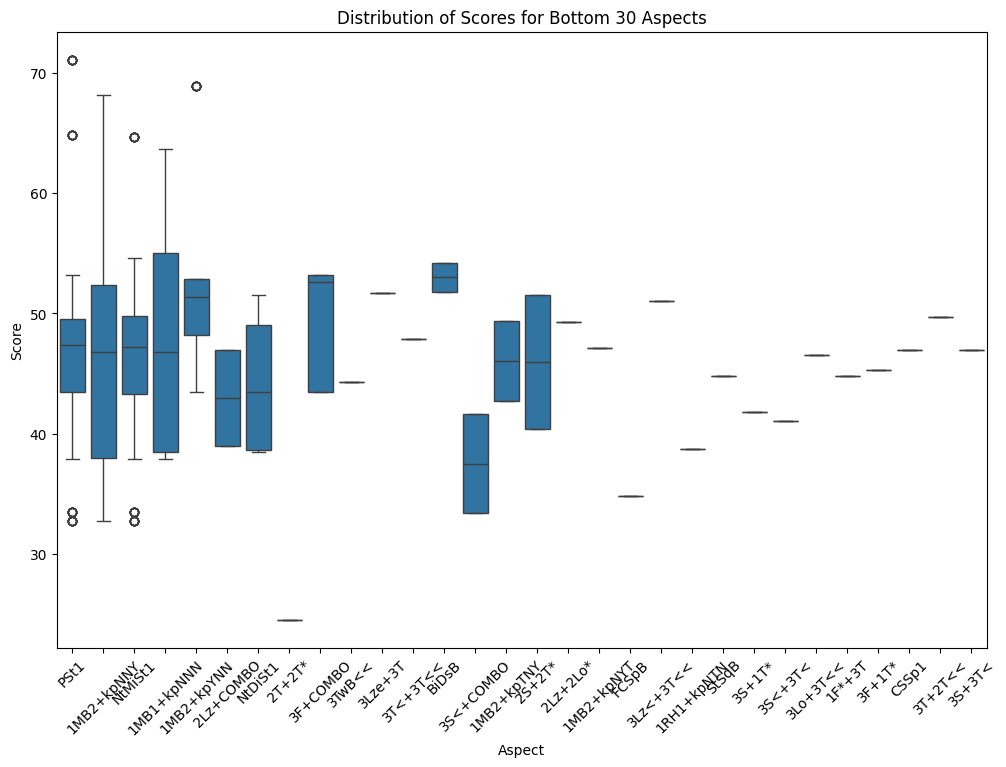

In [ ]:

# Get the bottom 30 aspects based on mean score
bottom_30_aspects = mean_scores.nsmallest(30).index.tolist()

# Filter the DataFrame to include only the bottom 30 aspects
df_bottom_30 = full_routine_info[full_routine_info['aspect_desc'].isin(bottom_30_aspects)]

# Plot a boxplot for the bottom 30 aspects
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_bottom_30, x='aspect_desc', y='total_segment_score')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Aspect')
plt.ylabel('Score')
plt.title('Distribution of Scores for Bottom 30 Aspects')
plt.show()

**Takeaways:**

The main takeaways here are:
* The spread of number of times these aspects were recorded are slightly less varied than that of the top 30 aspects. We can likely attribute the top 30 aspects being more highly rated, thus competitors are more likely to perform them to get a higher score.
* Additionally, the spread of scores is vastly different than the top 30. The range of the y axis of the top 30 aspects went from 100 to 220 for total_segment_score, while the bottom 30 aspects ranged from 30 to 70. This is a very large difference. As we consider aspects in relation to our model creation, we will likely have a hard time training on the extremely large amount of features in our dataset.



## 4.5 Feature Correlation Heatmap  

**Motivation:**

As alternative form of EDA before we continued on to the model building stage of our journey, we decided that a feature correlation heatmap would shed some light as to which features correlate with the other features. We figured this would help with identifying multicollinearity as well as what to build our models off of when selected and not selecting certain columns in our data. While we were not able to include the numeric columns of our data the graphs above were able to help us discern the patterns that the program had on the rest of the data

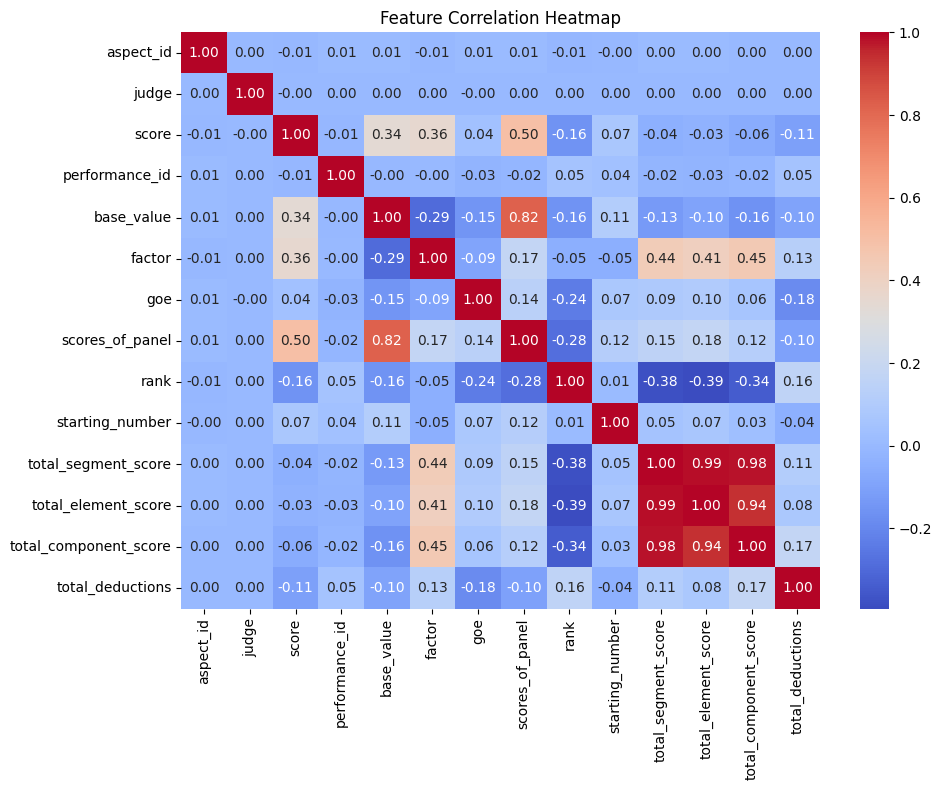

In [ ]:
# feature correlation heatmap
numeric_columns = full_routine_info.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr = numeric_columns.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})

# Add title
plt.title('Feature Correlation Heatmap')

# Show plot
plt.tight_layout()
plt.show()

**Takeaways:**

We expected the three scores attributes to be correlated the highest, but did not anticipate some of the other patterns seen above. The effect of rank on score makes sense intuitively, however the effect of performance id on a persons score, as well as the effect of a persons rank on their total deductions raised questions of the judge's score backgrounds.

##**4.6 Initial Takeaways Post-EDA**



Based on the analysis of the data, several key insights emerge that will inform the creation of models predicting the total score for a performance. Initially, we expected a high correlation among the three score attributes, yet unexpected patterns emerged.
* While the intuitive relationship between rank and score was evident, surprising effects of performance ID on a person's score and a person's rank on their total deductions raised questions about judge scoring practices.
* Lower ranks exhibited a steep drop-off in score, while Italy emerged as a consistently strong nation in ice skating. However, discrepancies in deductions by nation hinted at potential biases among judges. For instance, Eastern European countries displayed minimal deductions despite not being the highest performers, while Russia faced disproportionately high deductions, suggesting possible bias against Russian skaters.
* Additionally, rank revealed nuanced insights into performance quality and country representation. Countries like Russia and North American nations dominated in terms of performance frequency, highlighting the sport's regional dynamics. We saw the **outlier** of countries that had more performances overall (ie. Russia) due to a higher sample size.
* Variations in performance frequency and average score showed the need to account for both factors in modeling efforts. Therefore, while the average score alone may not fully capture performance quality, it remains a valuable metric when considered alongside performance frequency.
* Overall, from what we learned through the graphs depicting relationships of aspects and other factors, we will keep a close eye on how these features play out in various models and determine if things like tuning or hyperparamter tuning are necessary for modeling in our data set. Overall there weren't too many outliers with regards to the aspects, there is just a extremely diverse set of aspects that are rated differently by score.

Moving forward, our models will be tuned to respect the diverse performance landscape and regional dynamics observed in the data.

# **Part 5: Feature Engineering and Pre-Processing**

### 5.1 One Hot Encoding by Dummy Values

Since our dataset contains key categorical variables, we decided to begin feature engineering by applying one hot encoding to our data. This helped us accomplish the following:

1. **Numerical Data:** In order to run any useful models on our data we need to create a numerical representation of the Elements given they are are current in the form of number/letter combinations

2. **Avoiding Bias:** With other approaches to creating a numerical representation of the Element data it is easy to order skills with higher quantities (2A vs 4A) as having a higher weight when that might not be the case. A quadruple Lutz could be less beneficial to a final score than a triple if athletes score low in the GOE section, and country 3 (for example) should not be weighted more than country 1. Given this possibility we aimed to avoid bias with using dummies.


We start with identifying our categorical features:

`aspect_desc` this is arguably the most important feature in our dataset. We will be examining how the performance of a certain aspect (or lack thereof) can help predict score.

`section` we will also look at how the section of such an aspect (whether it is an element or component) can help predict score

`nation` finally, we will need to encode the skater's country so we can examine how where they are from plays a part in the score they receive

In [ ]:
categorical_features = ["aspect_desc", "section", "nation"]

Now using the get_dummies method from pandas we can create our dummy columns. Because of the nature of the function it uses true and false values when making the extra columns. To remedy this we apply a lambda function to the data frame coverting False to 0 and True to 1. After this step, we will have columns indicating the prescence of any possible aspect as well as whether the aspect fell into the component or element category, and indicating what country the skater is from.

In [ ]:
# One-hot encode
full_routine_info = pd.get_dummies(full_routine_info, columns=categorical_features, drop_first=False)
full_routine_info = full_routine_info.applymap(lambda x: 1 if x == True else 0 if x == False else x)

In [ ]:
full_routine_info.head(10)

,aspect_id,judge,score,performance_id,base_value,factor,goe,scores_of_panel,rank,starting_number,...,nation_SLO,nation_SRB,nation_SUI,nation_SVK,nation_SWE,nation_TPE,nation_TUR,nation_UKR,nation_USA,nation_UZB
0,55284756,1,9.00,782654469209,11.34,0.8,0.0,9.07,1,33,...,0,0,0,0,0,0,0,0,0,0
1,55284756,2,9.00,782654469209,11.34,0.8,0.0,9.07,1,33,...,0,0,0,0,0,0,0,0,0,0
2,55284756,3,8.75,782654469209,11.34,0.8,0.0,9.07,1,33,...,0,0,0,0,0,0,0,0,0,0
3,55284756,4,9.25,782654469209,11.34,0.8,0.0,9.07,1,33,...,0,0,0,0,0,0,0,0,0,0
4,55284756,5,9.00,782654469209,11.34,0.8,0.0,9.07,1,33,...,0,0,0,0,0,0,0,0,0,0
5,55284756,6,9.50,782654469209,11.34,0.8,0.0,9.07,1,33,...,0,0,0,0,0,0,0,0,0,0
6,55284756,7,9.25,782654469209,11.34,0.8,0.0,9.07,1,33,...,0,0,0,0,0,0,0,0,0,0
7,55284756,8,9.00,782654469209,11.34,0.8,0.0,9.07,1,33,...,0,0,0,0,0,0,0,0,0,0
8,55284756,9,9.00,782654469209,11.34,0.8,0.0,9.07,1,33,...,0,0,0,0,0,0,0,0,0,0
9,4960777383,1,9.25,782654469209,11.42,0.8,0.0,9.14,1,33,...,0,0,0,0,0,0,0,0,0,0


## 5.2 Create training and testing split

We will use a 20% `test_size` metric to create a training/testing split of our data. In addition, we set our `random_state` seed = 42 as we did in recitation. These steps are crucial to any modeling process.

In [ ]:
#determine the features from our df- everything but total_segment_score, the id numbers, and the values used to actually calculate the total segment score
features = full_routine_info.drop(['total_segment_score', 'aspect_id', 'performance_id', 'total_element_score', 'total_component_score', 'total_deductions', 'factor', 'goe', 'base_value', 'score'], axis = 1)

#determine the target from our dataframe- only total_segment_score
target = full_routine_info['total_segment_score']

#make the training/testing datasets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state = 42)

## 5.3 PCA

We will now proceed by scaling and applying PCA to our data. This will help us accomplish a few things. First of all, the numerical values of our data span a variety of ranges, so standardization will improve the accuracy of PCA. Additionally, we currently have ~700 features in our model, so PCA will help us determine how many features it would be best to include and what these features are. In narrowing down which features are most important, PCA will help reduce collinearity of our data, which we suspect may be a problem as, for example, our total segment score column is the sum of some other columns.



In [ ]:
#scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

#Instantiate and fit PCA
pca = PCA()
X_train_pca_fit = pca.fit(X_train_scaled)



We will now analyze the Cumulative Explained Variance Ratios of our data. We will select the number of components that maintain 80% cumulative explained variance.

In [ ]:
#calculate cumulative evr
evr = pca.explained_variance_ratio_
cevr = np.cumsum(evr)

In [ ]:
#Find the # of features where cevr first breaks 0.8 (add one because this is an index)
num_features = np.argmax(cevr >= 0.8) + 1
num_features

538

Now that we know our desired number of components is 540, let's actually apply this optimal PCA model to our data.

In [ ]:
#refit and transform on both train and test data
pca = PCA(n_components = num_features)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Part 6: Modeling


Now that we have cleaned and processed training and testing datasets, we can begin modeling our data. We will be using multiple different regression techniques and evaluating them based off regression metrics such as R-squared value, as well as assessing relative importance of features.

## 6.1 Linear Regression

We begin with our baseline model: a Linear Regression. We opted to use our data post-PCA as it best represents the set of features we believe is most important to analyze. We will compare testing and training R^2 values as well as root mean squared error to provide a more interpretable metric for our model's performance in relation to our data.

In [ ]:
# Train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train_pca, y_train)

# Evaluate the model on the test set
y_pred = lr_model.predict(X_test_pca)

print('Training R^2: ', lr_model.score(X_train_pca, y_train))
print('Testing R^2: ', lr_model.score(X_test_pca, y_test))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_pred)))

Training R^2:  0.2952180995663696
Testing R^2:  0.2984690118347788
Root Mean Squared Error:  31.126649396632036


With this Linear Regression, our testing and training R^2 values are both very low, indicating our model does not fit the dataset very well. Our RMSE further validates this, as it appears relatively high, indicating an average error of about 31 points when predicting segment score. This is most likely an issue of underfitting, so we will use more complex models to more accurately fit our data.

We will proceed by examining which features contribute most based on their coefficients. Since our model uses so many features (~540), we will only examine the top 20 in magnitude in both positive and negative weight.

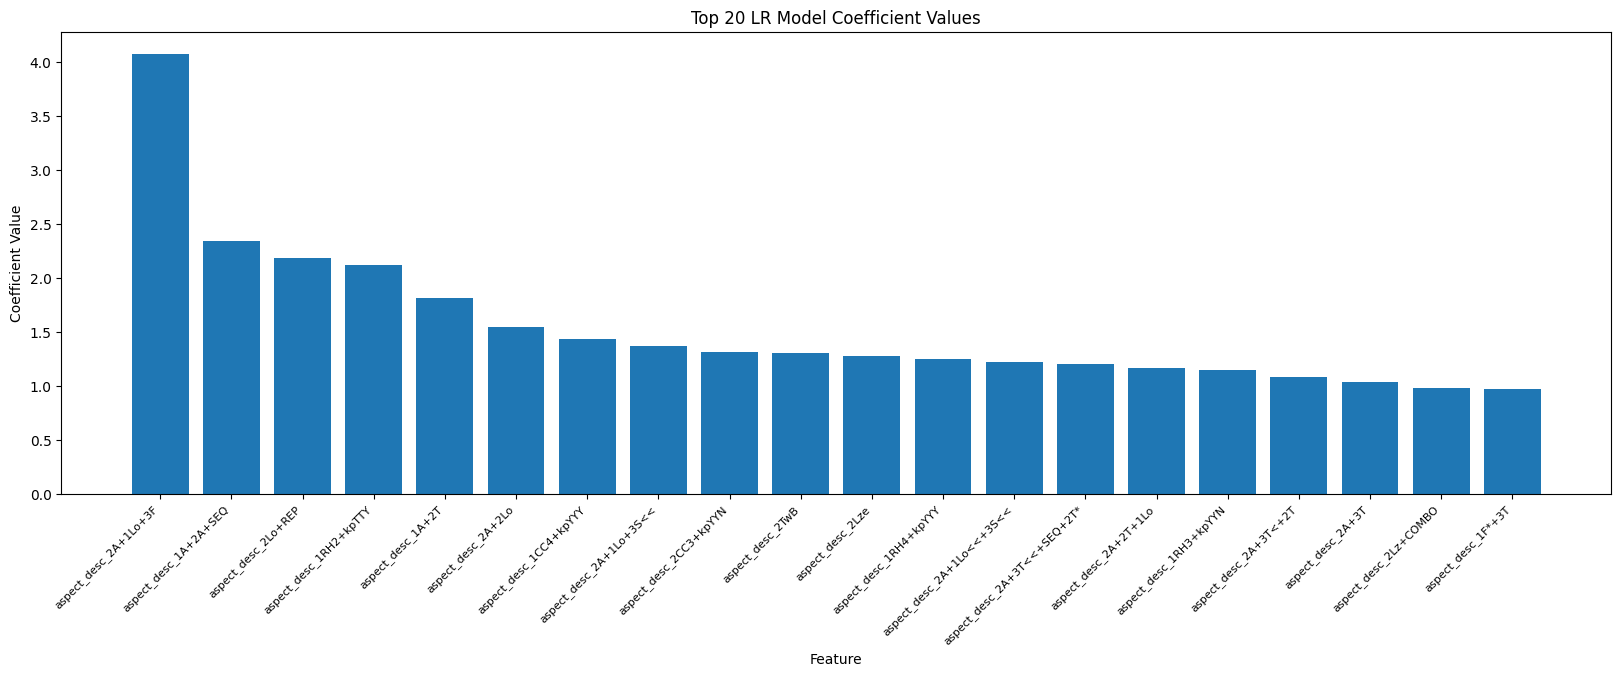

In [ ]:
#extract all coefficients and features
coefficients = lr_model.coef_
f_names = features.columns

#sort and get the top 20
indices = np.argsort(coefficients)[::-1]
top_twenty_i = indices[:20]
top_twenty_c = coefficients[top_twenty_i]
top_twenty_f = np.array(f_names)[top_twenty_i]

#create bar plot of top 20
plt.figure(figsize=(20, 6))
plt.bar(top_twenty_f, top_twenty_c)
plt.xlabel('Feature')
plt.ylabel('Coefficient Value')
plt.title('Top 20 LR Model Coefficient Values')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.show()

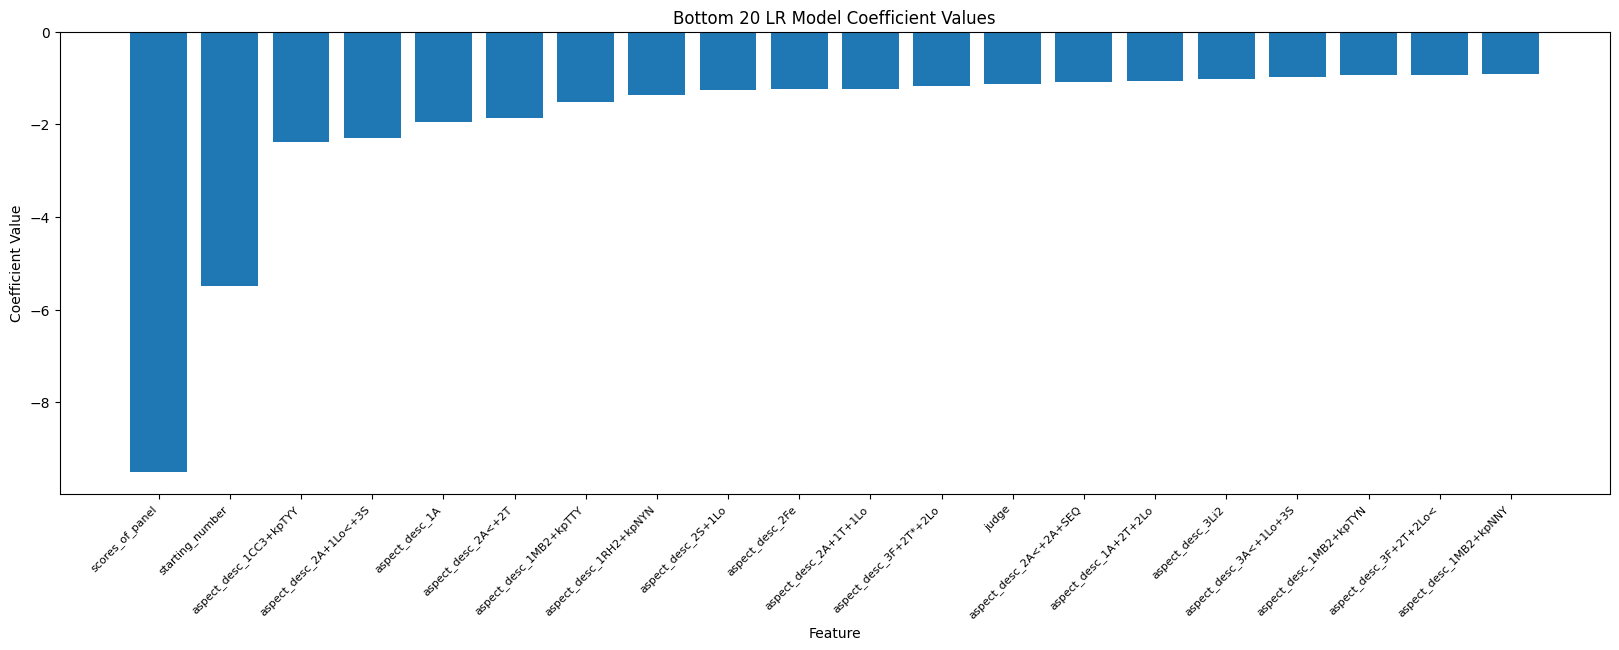

In [ ]:
#sort and get the bottom 20
bottom_indices = np.argsort(coefficients)
b_twenty_i = bottom_indices[:20]
b_twenty_c = coefficients[b_twenty_i]
b_twenty_f = np.array(f_names)[b_twenty_i]

#create bar plot of bottom 20
plt.figure(figsize=(20, 6))
plt.bar(b_twenty_f, b_twenty_c)
plt.xlabel('Feature')
plt.ylabel('Coefficient Value')
plt.title('Bottom 20 LR Model Coefficient Values')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.show()

These graphs provide us with some interesting results, though we must take them with a grain of salt given the inaccuracy of our model. We note that it appears as though there is an equal representation of both complex aspects and simple ones in both the list of features with the most positive impact on score and list of features with the most negatice impact on score. This makes it difficult to identify a trend in which aspects most strongly contribute to a higher score. It is interesting to note, though, that no nation indicator columns appear in either graph, suggesting where a skater is from has little impact on the score they receive.

## 6.2 Elastic Net Regression

In order to evaluate the performance of a different model and gain a different perspective on which features hold importance, we decided to fit an Elastic Net Regression. This model will combine the best benefits from Ridge annd Lasso regression. Since the elastic net model will handle collinearity and variable selection, we choose not to use our PCA datasets. Because of the L1 and L2 penalties applied in this model, we expect it to improve our already good performance from the linear regression model. We begin by fitting a model with arbitrary hyperparamters.

In [ ]:
#fit and evaluate initial model

from sklearn.linear_model import ElasticNet

# Train the elastic net regression model
enr_model = ElasticNet(alpha=1.0, l1_ratio = 0.5)
enr_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = enr_model.predict(X_test)

print('Training R^2: ', enr_model.score(X_train, y_train))
print('Testing R^2: ', enr_model.score(X_test, y_test))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_pred)))

Training R^2:  0.16013178485680057
Testing R^2:  0.1667808208201328
Root Mean Squared Error:  33.92255639818284


Surprisingly, the Elastic Net Model performs worse, fitting both the training and testing data extremely poorly and having a very high rmse. We used relatively arbitrary hyperparamters here based on standard, so we decided to preoceed by performing Bayesian Optimization to tune these hyperparameters to see if this may improve the model performance. Unfortunately, due to the complex nature of the algorithm and abundance of features/data we have, we had to minimize the parameter space as well as not fit Bayes Search on all of our data in order to minimize computation time/space.

In [ ]:
#perform Bayesian Optimization
import skopt
from skopt import BayesSearchCV
from sklearn.metrics import make_scorer

#for Bayesian Optimization scoring
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

#create model
enr_model_gs = ElasticNet()

#create hyperparameter grid
params = {'alpha': (0.1, 1), 'l1_ratio': (0.5, 0.75)}

#create Bayesian Optimization
bayes_search = BayesSearchCV(enr_model_gs, params, cv = 5, scoring = make_scorer(rmse, greater_is_better=False))

In [ ]:
#fit and predict from best model
bayes_search.fit(X_train[:50000], y_train[:50000])

In [ ]:
best_enr_model = bayes_search.best_estimator_
best_enr_model.fit(X_train, y_train)
y_pred_bayes_enr = best_enr_model.predict(X_test)

#evaluate best model
print('Training R^2: ', best_enr_model.score(X_train, y_train))
print('Testing R^2: ', best_enr_model.score(X_test, y_test))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_pred_bayes_enr)))

Our hyperparameter tuning did improve the fit of the model to both training and testing data and rmse, but not by much. This may suggest that the relationship exhbitied in our data is not linear. We will still examine the coefficient values to gain an understanding of the relative importance of our features, but we will try a different, non-linear model in the future.

In [ ]:
#extract all coefficients and features
coefficients = best_enr_model.coef_
f_names = features.columns

#sort and get the top 20
indices = np.argsort(coefficients)[::-1]
top_twenty_i = indices[:20]
top_twenty_c = coefficients[top_twenty_i]
top_twenty_f = np.array(f_names)[top_twenty_i]

#create bar plot of top 20
plt.figure(figsize=(20, 6))
plt.bar(top_twenty_f, top_twenty_c)
plt.xlabel('Feature')
plt.ylabel('Coefficient Value')
plt.title('Top 20 Elastic Net Model Coefficient Values')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.show()

In [ ]:
#sort and get the bottom 20
bottom_indices = np.argsort(coefficients)
b_twenty_i = bottom_indices[:20]
b_twenty_c = coefficients[b_twenty_i]
b_twenty_f = np.array(f_names)[b_twenty_i]

#create bar plot of bottom 20
plt.figure(figsize=(20, 6))
plt.bar(b_twenty_f, b_twenty_c)
plt.xlabel('Feature')
plt.ylabel('Coefficient Value')
plt.title('Bottom 20 Elastic Net Model Coefficient Values')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.show()

These results prove a little more interesting than those from the linear regression model. We see that the Choreo Sequence (ChSq1) aspect seems to have an extremely positive relationship with overall score, while the Set of Twizzles (STw4) has an extremely negative relationship with score. This can inform skater's on the importance of these aspects in their routine. Additionally, components seem to have more of a negative relationship with score, indicating elements may be more important. Finally, we notice now that the skater's nation does play a role in their score in this model, with being from Spain improving a skater's score the most and being from Italy decreasing their score the most.

## 6.3 Random Forest Regression

Finally, we wanted to examine the performance of a non-linear regression model on our data, so we decided to feet a Random Forest Regression model. We expect this model to perform well as it has a low risk of overfitting and handles noise/outliers well, and may identify relationships previously unrecognized by other models. We choose to use our post-PCA data in orderd to optimize the number of features in our model, even though the random forest model works well with data that is not scaled.

In [ ]:
#fit and evaluate initial model

from sklearn.ensemble import RandomForestRegressor

# Train the random Forest regression model
random_forest = RandomForestRegressor(n_estimators = 20, max_depth = 5, max_features = 'sqrt', random_state = 42)
random_forest.fit(X_train_pca, y_train)

# Evaluate the model on the test set
y_pred = random_forest.predict(X_test_pca)

print('Training R^2: ', random_forest.score(X_train_pca, y_train))
print('Testing R^2: ', random_forest.score(X_test_pca, y_test))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_pred)))

Surprisingly again, the Random Forest model performs poorly, fitting both the training and testing data extremely unwell and having a very high rmse. The lowe R^2 for testing data suggests potential overfitting. We used relatively arbitrary hyperparamters here and had to lower them to increase computation time, which may have contributed to poor performance. We still decided to preoceed by performing Grid Search to tune these hyperparameters to see if this may improve the model performance.

Like with the Elastic Net Regression, due to the complex nature of the algorithm and abundance of features/data we have, we had to use Grid Search instead of Bayes Search, minimize the parameter space as well as not fit Gird Search on all of our data in order to minimize computation time/space.

In [ ]:
#perform Bayesian Optimization
import skopt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

#for Grid Search scoring
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

#create model
random_forest_gs = RandomForestRegressor(max_features = 'sqrt', random_state = 42)

#create hyperparameter grid
params = {'n_estimators': [10, 20], 'max_depth': [3, 5]}

#create Bayesian Optimization
grid_search = GridSearchCV(random_forest_gs, params, cv = 5, scoring = make_scorer(rmse, greater_is_better=False))

In [ ]:
#fit and predict from best model
grid_search.fit(X_train_pca[:50000], y_train[:50000])

In [ ]:
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train_pca, y_train)
y_pred_grid_rf = best_rf_model.predict(X_test_pca)

#evaluate best model
print('Training R^2: ', best_rf_model.score(X_train_pca, y_train))
print('Testing R^2: ', best_rf_model.score(X_test_pca, y_test))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_pred_grid_rf)))

Our model's performance metrics improve slightly, but not by much. This is likely due to the hyperparameter limitations we have imposed to ensure efficient computing time/space- either that or a lack of correlation explainable by this model. Let's look at the feature importances delegated by our best random forest model.

In [ ]:
#extract all coefficients and features
coefficients = best_rf_model.feature_importances_
f_names = features.columns

#sort and get the top 20
indices = np.argsort(coefficients)[::-1]
top_twenty_i = indices[:20]
top_twenty_c = coefficients[top_twenty_i]
top_twenty_f = np.array(f_names)[top_twenty_i]

#create bar plot of top 20
plt.figure(figsize=(20, 6))
plt.bar(top_twenty_f, top_twenty_c)
plt.xlabel('Feature')
plt.ylabel('Coefficient Value')
plt.title('Top 20 Random Forest Model Coefficient Values')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.show()

In [ ]:
#sort and get the bottom 20
bottom_indices = np.argsort(coefficients)
b_twenty_i = bottom_indices[:20]
b_twenty_c = coefficients[b_twenty_i]
b_twenty_f = np.array(f_names)[b_twenty_i]

#create bar plot of bottom 20
plt.figure(figsize=(20, 6))
plt.bar(b_twenty_f, b_twenty_c)
plt.xlabel('Feature')
plt.ylabel('Coefficient Value')
plt.title('Bottom 20 Random Forest Model Coefficient Values')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.show()

The feature importances from our random forest model provide an alternative perspective than before, since these are all weights between 0 and 1, so our bottom 20 features are ones the model deemed irrelevant. Notably, these are all aspects- it is interesting that this model did not find any of the nation features or anything else as irrelelevant it did these aspects. In terms of the most important features, the panel's score for a particular aspect was deemed most important. This makes sense- total score is likely to be greater when an individual aspect receives a higher score. Aside from that, there seems to be a large presence of toeloop containing compound aspects (aspect names with a capital T and + in them) this model deemed important. However, many of the "unimportant" aspects also contained toeloops, so it is difficult to draw a finite conclusion from this. Interestingly again, there is no indication of the skater's nation playing a significant role in the score they receive.

# Part 7: Conclusions


**Takeaways:**
1. Likely due to the highly subjective nature of figure skating scoring, overally scores are extremely difficult to predict using standard regression models. Additionally, such models do not provide consistent/easily discernable insight into which aspects performed/other characteristics of a performance most impact total score.

2. Our analysis was likely hindered by the extremely vast number of features our dataset contained, even after PCA. This made analysis more inaccurate due to sparsely distributed data points, and forced us to limit model complexity in order to decrease computational power needed. As a result, our models performed poorly.

3. Our best performing model was actually our most simple- our baseline linear regression. It produced an R-squared value of about 0.3, and RMSE of about 31.

4. A large issue we had to overcome throughout our analysis was the removal of variables that too obviously revealed the total score. This was because we did not drop features which are directly used in the formula calculation for total segment score, believing they would be corrected during PCA/other methods of accounting for collinearity. Instead, certain results revealed they were not (like examining coefficient values only to see that all were set to 0 except for element score, component score, and deductions, which are summed to calculate segment score), so we had to drop these features.

5. The implications of our modeling are likely not reliable enough for stakeholders to interpret; however, there is potential to reveal which aspects are important to include in a routine/not important through further study.

6. **In the future** a further study would begin by perhaps cleaning our original data differently, such as partitioning by inclusion of a specific sub-aspect in a compound aspect or by using a different encoding measure other than one-hot. It would also include further dimensionality reduction as well as processing on a distributed cluster or on hardware with more computing power. Additionally, future studies could employ deep learning techniques such as neural networks to perform a more complex modeling that may reveal deeper insights.  

**Overall Experience + Team Reflection:**

1. Working on this project was a great experience as we were able to constantly bounce ideas off of one another, and provide our own perspectives off various models and ideas to pursue different tactics.
2. The cohesiveness of the group was very crucial as the filming of the project became difficult when our group was split due to very unfortunate circumstances, nonetheless, we were able to communicate and come out with a fantastic end product!
3. Much appreciation goes out to Federico and his help throughout this project, thank you!